# Readout line

In [1]:
#Enables module automatic reload. 
#Your notebook will be able to pick up code updates made to qiskit-metal (or other) module code.

%reload_ext autoreload
%autoreload 2

Import key libraries and open the Metal GUI. Also we configure the notebook to enable overwriting of existing components

In [2]:
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

design = designs.DesignPlanar()
gui = MetalGUI(design)

# If you disable the next line with "overwrite_enabled", then you will need to 
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

In [3]:
from qiskit_metal.qlibrary.passives.launchpad_wb_coupled import LaunchpadWirebondCoupled

#Explore the options of the LaunchpadWirebondCoupled.
LaunchpadWirebondCoupled.get_template_options(design)

{'layer': '1',
 'trace_width': 'cpw_width',
 'trace_gap': 'cpw_gap',
 'coupler_length': '62.5um',
 'lead_length': '25um',
 'pos_x': '0um',
 'pos_y': '0um',
 'orientation': '0'}

In [4]:
from qiskit_metal.qlibrary.interconnects.meandered import RouteMeander

#Explore the options of the RouteMeander.
RouteMeander.get_template_options(design)

{'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'chip': 'main',
 'layer': '1',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '0um'},
 'snap': 'true',
 'prevent_short_edges': 'true'}

In [5]:
from qiskit_metal.qlibrary.connectors.open_to_ground import OpenToGround

#Explore the options of the OpenToGround.
OpenToGround.get_template_options(design)

{'width': '10um',
 'gap': '6um',
 'termination_gap': '6um',
 'pos_x': '0um',
 'pos_y': '0um',
 'orientation': '0',
 'chip': 'main',
 'layer': '1'}

In [6]:
#Setup the launchpad location and orientation.
launch_options = dict(pos_x='990um', pos_y='2812um', orientation='270', lead_length='30um')

lp = LaunchpadWirebondCoupled(design, 'P4_Q', options = launch_options)

In [7]:
#Setup the OpenToGround location and orientation.
otg_options = dict(pos_x='2.5mm',  pos_y='0.5mm', orientation='0')

otg = OpenToGround(design, 'open_to_ground', options=otg_options)

In [8]:
#After the two QComponents are added to design, connect them with a RouteMeander.
meander_options = Dict(
        total_length='10 mm',
        fillet='90 um',
        lead = dict(start_straight='100um'),
        pin_inputs=Dict(
            start_pin=Dict(component=lp.name, pin='tie'),
            end_pin=Dict(component=otg.name, pin='open')), )

meander = RouteMeander(design, 'bus',  options=meander_options)
gui.rebuild()
gui.autoscale()

In [9]:
# Get a list of all the qcomponents in QDesign and then zoom on them.
all_component_names = design.components.keys()

gui.zoom_on_components(all_component_names)

In [10]:
# Look at the options of the launch pad in QDesign.
lp.options

{'layer': '1',
 'trace_width': 'cpw_width',
 'trace_gap': 'cpw_gap',
 'coupler_length': '62.5um',
 'lead_length': '30um',
 'pos_x': '990um',
 'pos_y': '2812um',
 'orientation': '270'}

In [11]:
# Look at the options of the RouteMeander in QDesign.
meander.options

{'pin_inputs': {'start_pin': {'component': 'P4_Q', 'pin': 'tie'},
  'end_pin': {'component': 'open_to_ground', 'pin': 'open'}},
 'fillet': '90 um',
 'lead': {'start_straight': '100um',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '10 mm',
 'chip': 'main',
 'layer': '1',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '0um'},
 'snap': 'true',
 'prevent_short_edges': 'true',
 'trace_gap': 'cpw_gap',
 '_actual_length': '10.0 mm'}

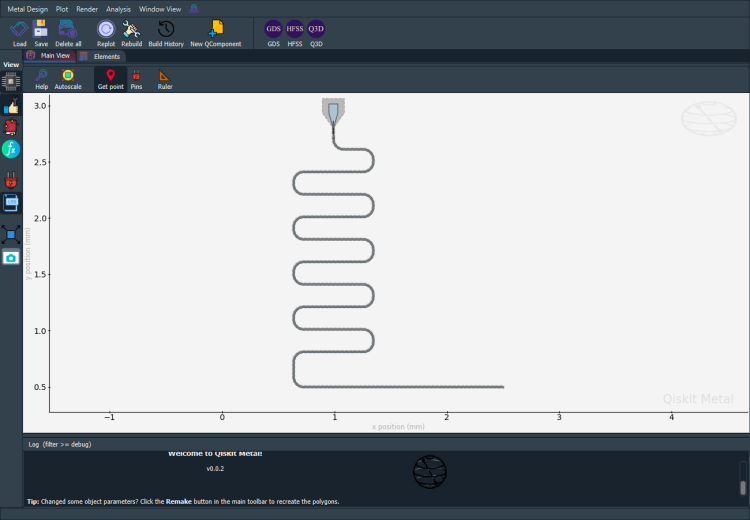

In [12]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [13]:
# Closing the Qiskit Metal GUI
gui.main_window.close()

True